# DATA EXPLORATION AND DATA VISUALIZATION FROM LOANS DATASET

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
loan_dataset = pd.read_csv('data/loan_data_set.csv')
loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
loan_dataset.shape

(614, 13)

In [4]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
missvalue = loan_dataset.isnull().sum()
missvalue

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
duplicatevalue = loan_dataset.duplicated().sum()
duplicatevalue

0

 ### Handling the missing values and Duplication of Data

In [7]:
mode_dataset = loan_dataset['Self_Employed'].mode()[0]
mode_dataset

'No'

In [8]:
## in [Self_Employed ] column  i fii it with most appeared value which is 'No'

loan_dataset['Self_Employed'] = loan_dataset['Self_Employed'].fillna(mode_dataset)

In [9]:
mode_credit = loan_dataset['Credit_History'].mode()[0]
mode_credit

1.0

In [10]:
loan_dataset['Credit_History'] = loan_dataset['Credit_History'].fillna(mode_credit)

In [11]:
loan_amount = loan_dataset['LoanAmount'].mean()
loan_amount

146.41216216216216

In [12]:
## Filling the loan amount column with it mean for the missing values

loan_dataset['LoanAmount'] = loan_dataset['LoanAmount'].fillna(loan_amount)

In [13]:
## Filling the Gender column with Not_Mentioned for the missing value

loan_dataset['Gender'] = loan_dataset['Gender'].fillna('Not_Mentioned')

In [14]:
loan_amtTerm = loan_dataset['Loan_Amount_Term'].mode()[0]
loan_amtTerm

360.0

In [15]:
loan_dataset['Loan_Amount_Term'] = loan_dataset['Loan_Amount_Term'].fillna(loan_amtTerm)

In [16]:
dependent = loan_dataset['Dependents'].mode()[0]
dependent

'0'

In [17]:
loan_dataset['Dependents'] = loan_dataset['Dependents'].fillna(dependent)

In [18]:
married = loan_dataset['Married'].mode()[0]
married

'Yes'

In [19]:
loan_dataset['Married'] = loan_dataset['Married'].fillna(married)

In [20]:
loan_dataset.duplicated().sum()

## The results below shows that there is no duplicated data in our dataset

0

In [21]:
loan_dataset.isnull().sum()

## The results shows that we have removed the missing value from our dataset

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

 ### Data Transformation and Visualization

In [22]:
loan_dataset.to_csv('cleaned_loandata.csv', index=False)

In [23]:
loan_dataset['Education'].value_counts(ascending=True)

## This show in level of their education people who have loans

Not Graduate    134
Graduate        480
Name: Education, dtype: int64

In [24]:
loan_dataset['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [25]:
loan_dataset['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [26]:
loan_dataset['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [27]:
loan_dataset['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [28]:
loan_dataset['Gender'].value_counts()

Male             489
Female           112
Not_Mentioned     13
Name: Gender, dtype: int64

In [29]:
aggregated_data = loan_dataset.groupby('LoanAmount').agg({'ApplicantIncome':['sum']})
aggregated_data.head()

,ApplicantIncome
,sum
LoanAmount,
9.0,2378
17.0,1299
25.0,7079
26.0,5468
30.0,4775


In [30]:
loan_dataset['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [31]:
aggregated_data2 = loan_dataset.groupby('LoanAmount').agg({'Property_Area':['sum']})
aggregated_data2.head(10)

,Property_Area
,sum
LoanAmount,
9.0,Urban
17.0,Urban
25.0,SemiurbanSemiurban
26.0,Semiurban
30.0,UrbanUrban
35.0,Urban
36.0,Semiurban
40.0,UrbanRural


In [32]:
aggregated_data3 = loan_dataset.groupby('LoanAmount').agg({'Self_Employed':['count']})
aggregated_data3.head(10)


,Self_Employed
,count
LoanAmount,
9.0,1
17.0,1
25.0,2
26.0,1
30.0,2
35.0,1
36.0,1
40.0,2


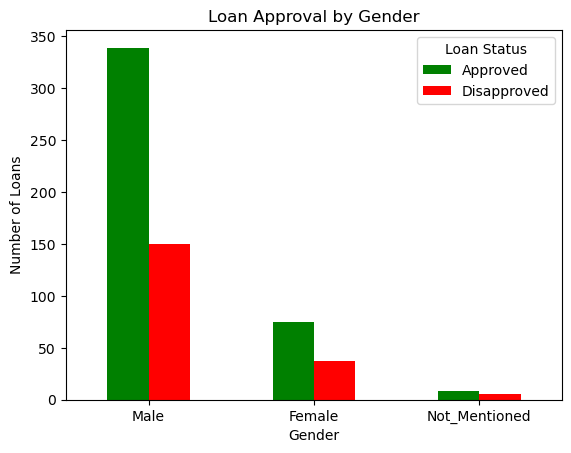

In [44]:
approved_loans = loan_dataset[loan_dataset['Loan_Status'] == 'Y']
disapproved_loans = loan_dataset[loan_dataset['Loan_Status'] == 'N']


approved_gender_counts = approved_loans['Gender'].value_counts()
disapproved_gender_counts = disapproved_loans['Gender'].value_counts()

gender_loan_counts = pd.DataFrame({
    'Approved': approved_gender_counts,
    'Disapproved': disapproved_gender_counts
})

# Graph
gender_loan_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Loan Approval by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Loans')
plt.xticks(rotation=0)
plt.legend(title='Loan Status', labels=['Approved', 'Disapproved'])
plt.savefig('loan-approval.png', bbox_inches='tight')
plt.show()

In [34]:
property_income_mean = loan_dataset.groupby('Property_Area')['ApplicantIncome'].mean()
property_income_mean


Property_Area
Rural        5554.083799
Semiurban    5292.261803
Urban        5398.247525
Name: ApplicantIncome, dtype: float64

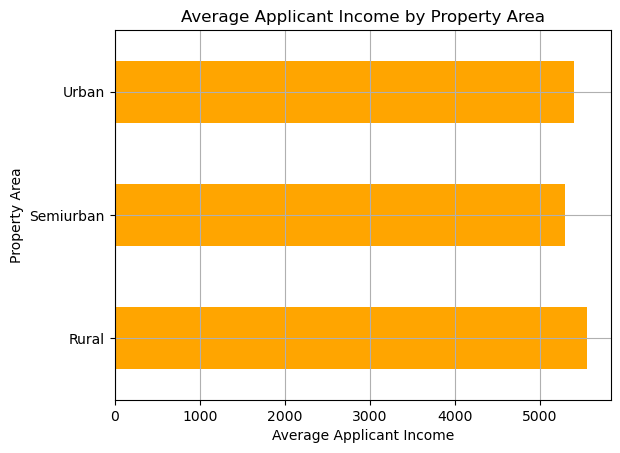

In [45]:
property_income_mean.plot(kind='barh', color='orange')
plt.title('Average Applicant Income by Property Area')
plt.xlabel('Average Applicant Income')
plt.ylabel('Property Area')
plt.grid(True)
plt.savefig('Average Applicant Income.png', bbox_inches='tight')
plt.show()

<Figure size 800x900 with 0 Axes>

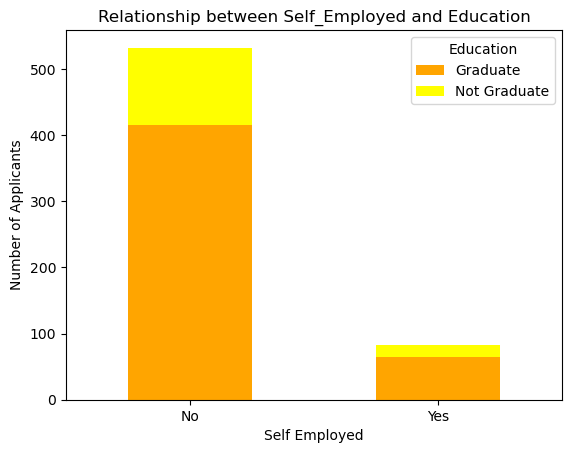

In [62]:
cross_tab = pd.crosstab(loan_dataset['Self_Employed'], loan_dataset['Education'])

# Plot the data as a stacked bar chart
plt.figure(figsize=(8, 9))
cross_tab.plot(kind='bar', stacked=True, color=['orange', 'yellow'])
plt.title('Relationship between Self_Employed and Education')
plt.xlabel('Self Employed')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=0)
plt.legend(title='Education', labels=['Graduate', 'Not Graduate'])
plt.savefig('Relationship between Self_Employed and Education.png', bbox_inches='tight')
plt.show()

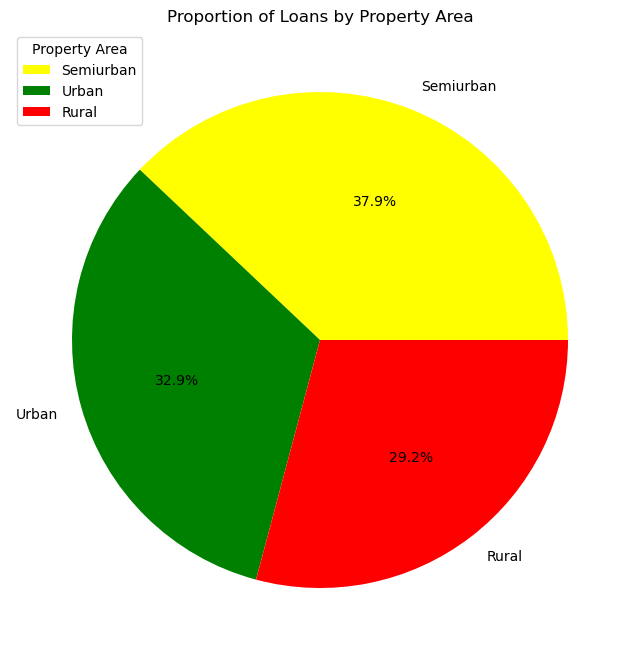

In [61]:
property_area_counts = loan_dataset['Property_Area'].value_counts()

plt.figure(figsize=(8, 9))
property_area_counts.plot(kind='pie', autopct='%1.1f%%', colors=['yellow', 'green', 'red'])
plt.title('Proportion of Loans by Property Area')
plt.ylabel('')  #
plt.legend(title='Property Area', labels=property_area_counts.index, loc='upper left')
plt.savefig('Proportion of Loans by Property Area.png', bbox_inches='tight')
plt.show()

 ### The graph below  shows that a scatter plot that directly shows the relationship between 'ApplicantIncome' and 'LoanAmount'. Each data point in the scatter plot represents an applicant's income on the x-axis and the corresponding loan amount on the y-axis.

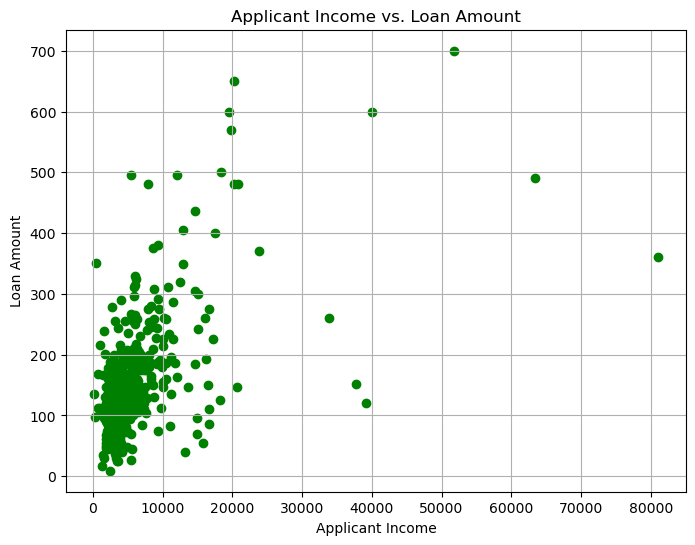

In [59]:
plt.figure(figsize=(8, 6))
plt.scatter(loan_dataset['ApplicantIncome'], loan_dataset['LoanAmount'], color='green')
plt.title('Applicant Income vs. Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.grid(True)
plt.savefig('Applicant Income vs. Loan Amount.png', bbox_inches='tight')
plt.show()


In [39]:
## Determing the Person who has taken large loan amount 

loan_id_highest_loan = loan_dataset['LoanAmount'].idxmax()

# Get the maximum loan amount
max_loan_amount = loan_dataset['LoanAmount'].max()

# the loan ID and the maximum loan amount
print("Loan ID with the highest loan amount:", loan_dataset.loc[loan_id_highest_loan, 'Loan_ID'])
print("Maximum loan amount:", max_loan_amount)

Loan ID with the highest loan amount: LP001585
Maximum loan amount: 700.0


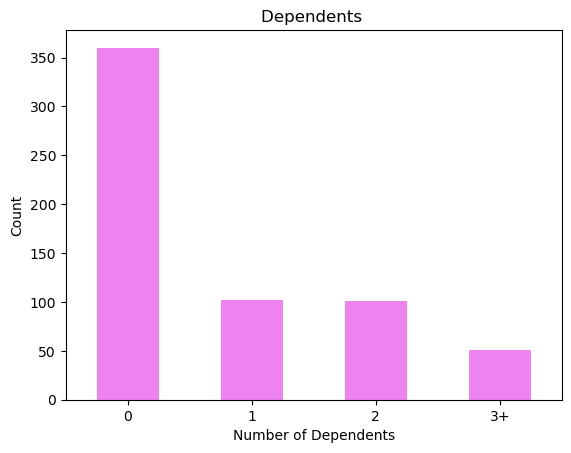

In [60]:
## Determining number of dependent

dependents_counts = loan_dataset['Dependents'].value_counts()

# Plot the data as a bar plot
dependents_counts.plot(kind='bar', color='violet')
plt.title('Dependents ')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.savefig('number-of-dependent.png', bbox_inches='tight')
plt.show()
